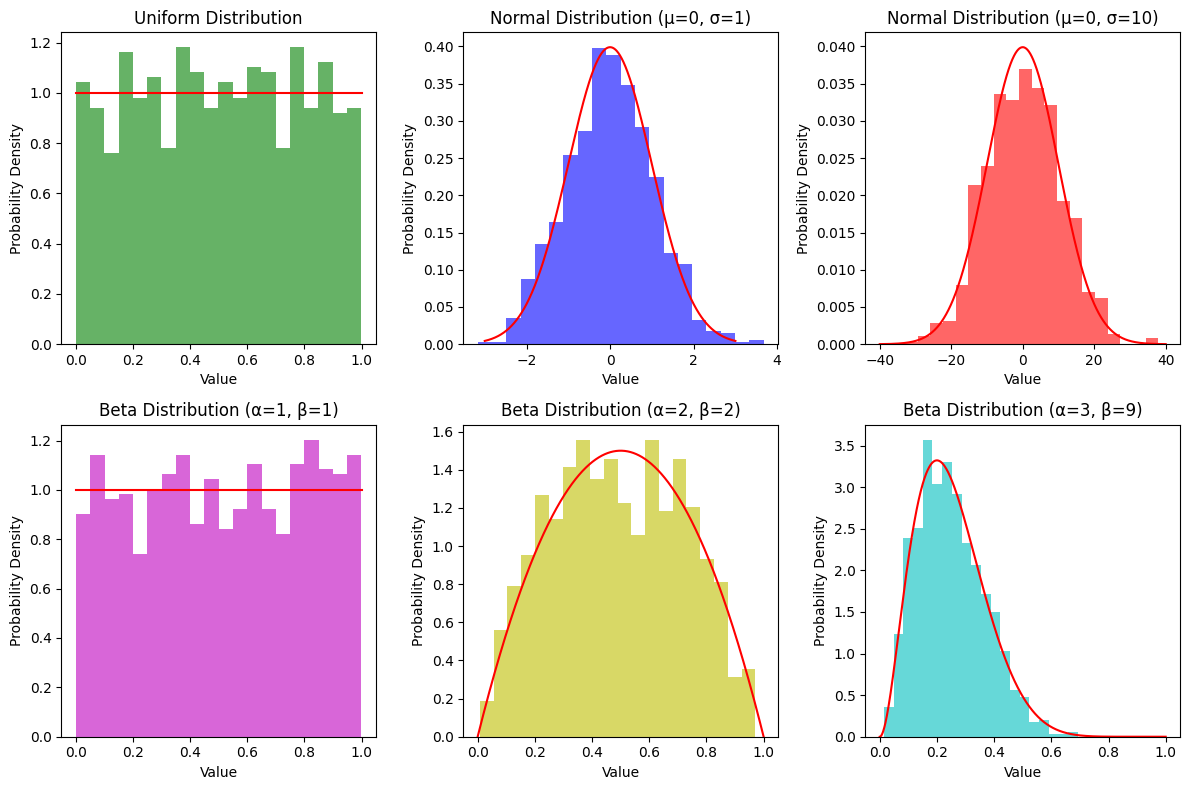

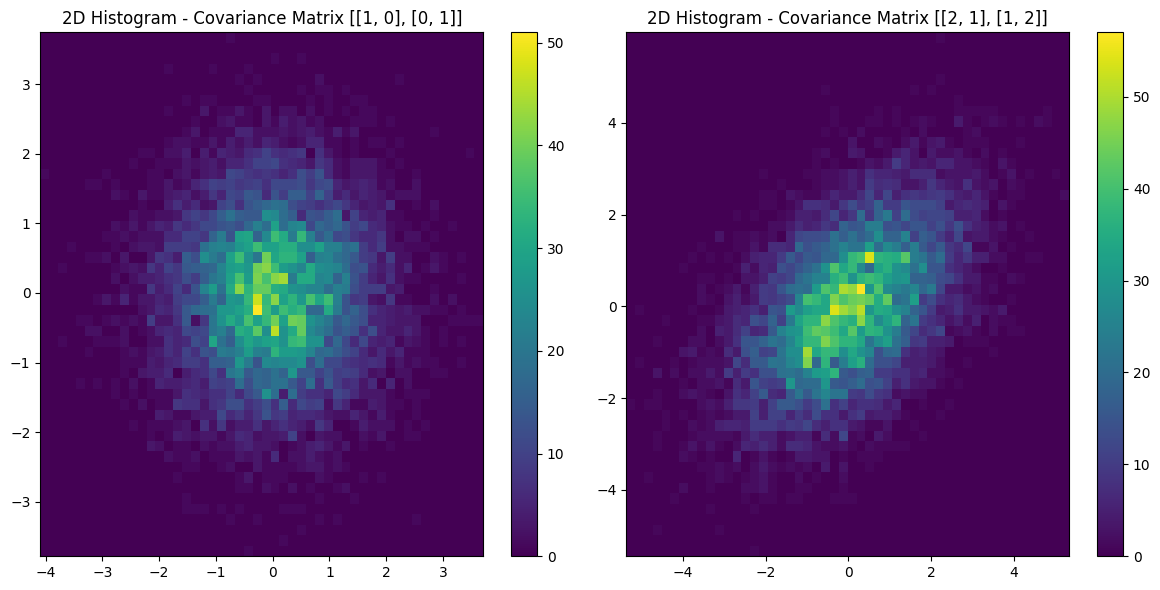

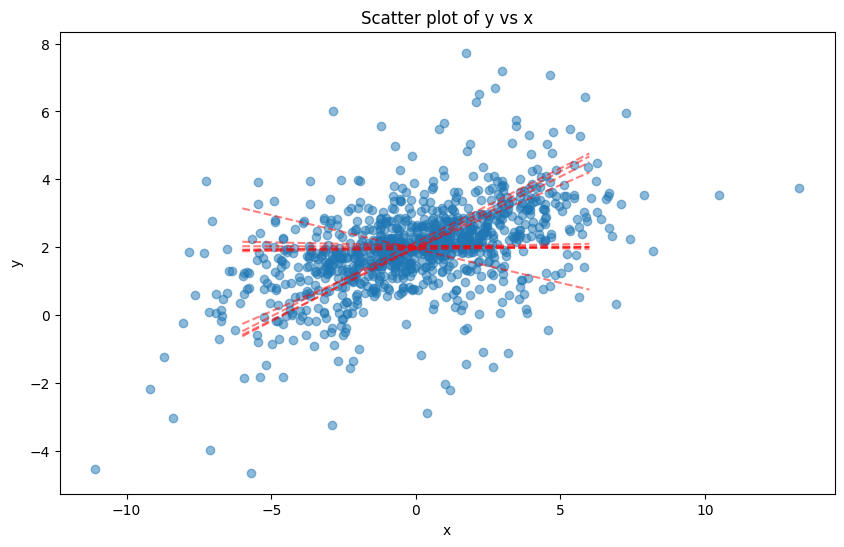

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, beta
import seaborn as sns

# 1000 samples of uniform distribution on interval [0,1]
uniform_samples = np.random.uniform(0, 1, 1000)

# 1000 samples of normal distribution with mean u=0 and standard deviation a=1
normal_samples_mean_0_std_1 = np.random.normal(0, 1, 1000)

# 1000 samples of normal distribution with mean u=0 and standard deviation a=10
normal_samples_mean_0_std_10 = np.random.normal(0, 10, 1000)

# 1000 samples of beta distribution for the following pairs of parameters (a,b) = (1,1),(2,2),(3,9)
beta_samples_1_1 = np.random.beta(1, 1, 1000)
beta_samples_2_2 = np.random.beta(2, 2, 1000)
beta_samples_3_9 = np.random.beta(3, 9, 1000)

# 10000 samples of two-dimensional normal distributions each with mean u=[0,0]^T and covariance matrices E1 = [1 0, 0 1], and E2 = [2 1, 1 2]
mean = [0, 0]
covariance_matrix_1 = [[1, 0], [0, 1]]
covariance_matrix_2 = [[2, 1], [1, 2]]
multi_normal_samples_1 = np.random.multivariate_normal(mean, covariance_matrix_1, 10000)
multi_normal_samples_2 = np.random.multivariate_normal(mean, covariance_matrix_2, 10000)

# Plot histograms for one-dimensional distributions
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.hist(uniform_samples, bins=20, density=True, alpha=0.6, color='g')
plt.plot(np.linspace(0, 1, 1000), np.full_like(x, 1), 'r', label='PDF')
plt.title('Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')

plt.subplot(2, 3, 2)
plt.hist(normal_samples_mean_0_std_1, bins=20, density=True, alpha=0.6, color='b')
plt.plot(np.linspace(-3, 3, 1000), norm.pdf(np.linspace(-3, 3, 1000), loc=0, scale=1), 'r', label='PDF')
plt.title('Normal Distribution (μ=0, σ=1)')
plt.xlabel('Value')
plt.ylabel('Probability Density')

plt.subplot(2, 3, 3)
plt.hist(normal_samples_mean_0_std_10, bins=20, density=True, alpha=0.6, color='r')
plt.plot(np.linspace(-40, 40, 1000), norm.pdf(np.linspace(-40, 40, 1000), loc=0, scale=10), 'r', label='PDF')
plt.title('Normal Distribution (μ=0, σ=10)')
plt.xlabel('Value')
plt.ylabel('Probability Density')

plt.subplot(2, 3, 4)
plt.hist(beta_samples_1_1, bins=20, density=True, alpha=0.6, color='m')
plt.plot(np.linspace(0, 1, 1000), beta.pdf(np.linspace(0, 1, 1000), a=1, b=1), 'r', label='PDF')
plt.title('Beta Distribution (α=1, β=1)')
plt.xlabel('Value')
plt.ylabel('Probability Density')

plt.subplot(2, 3, 5)
plt.hist(beta_samples_2_2, bins=20, density=True, alpha=0.6, color='y')
plt.plot(np.linspace(0, 1, 1000), beta.pdf(np.linspace(0, 1, 1000), a=2, b=2), 'r', label='PDF')
plt.title('Beta Distribution (α=2, β=2)')
plt.xlabel('Value')
plt.ylabel('Probability Density')

plt.subplot(2, 3, 6)
plt.hist(beta_samples_3_9, bins=20, density=True, alpha=0.6, color='c')
plt.plot(np.linspace(0, 1, 1000), beta.pdf(np.linspace(0, 1, 1000), a=3, b=9), 'r', label='PDF')
plt.title('Beta Distribution (α=3, β=9)')
plt.xlabel('Value')
plt.ylabel('Probability Density')

plt.tight_layout()
plt.show()

# Plot 2D histograms for two-dimensional distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist2d(multi_normal_samples_1[:,0], multi_normal_samples_1[:,1], bins=50, cmap='viridis')
plt.colorbar()
plt.title('2D Histogram - Covariance Matrix [[1, 0], [0, 1]]')

plt.subplot(1, 2, 2)
plt.hist2d(multi_normal_samples_2[:,0], multi_normal_samples_2[:,1], bins=50, cmap='viridis')
plt.colorbar()
plt.title('2D Histogram - Covariance Matrix [[2, 1], [1, 2]]')

plt.tight_layout()
plt.show()

# Generate 1000 y points from the given model
alpha = np.random.normal(2, 0.1, 1000)
beta = np.random.normal(0.2, 0.2, 1000)
x = np.random.normal(0, 3, 1000)
sigma = np.abs(np.random.normal(0, 1, 1000))
y = np.random.normal(alpha + beta * x, sigma)

# Plot y values as a function of x
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('Scatter plot of y vs x')
plt.xlabel('x')
plt.ylabel('y')

# Plot lines of y=alpha+beta*x for randomly sampled alpha and beta pair
x_values = np.linspace(-6, 6, 100)
for i in range(10):
    alpha_sample = np.random.choice(alpha)
    beta_sample = np.random.choice(beta)
    plt.plot(x_values, alpha_sample + beta_sample * x_values, linestyle='--', color='r', alpha=0.5)

plt.show()
